In [1]:
import os
import json

import numpy as np
import pandas as pd
import random

from PIL import Image
import matplotlib.pyplot as plt

import networkx as nx

## Load the Crypto Punks trading dataset

In [2]:
# Read the crypto_punks.csv
crypto_punks_df = pd.read_csv("Data/crypto_punks.csv")
crypto_punks_df.head()

,punk_id,type,accessories
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']"
1,1,Male,"['Smile', 'Mohawk']"
2,2,Female,['Wild Hair']
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']"
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']"


In [3]:
# Read the traders.csv
traders_df = pd.read_csv("Data/traders.csv")
traders_df.head()

,index,trader_id,txn_type,punk_id,eth,date,timestamp,source
0,4950,007,Bid,521,0.10,2019-12-17 00:00:00,2019-12-17 00:00:00,larvalabs
1,4949,007,Bid Withdrawn,521,0.10,2020-01-02 00:00:00,2020-01-02 00:00:00,larvalabs
2,126547,007,Purchased,7750,0.70,2020-04-07 00:00:00,2020-04-07 00:00:00,larvalabs
3,126545,007,Sold,7750,0.85,2020-04-08 00:00:00,2020-04-08 00:00:00,larvalabs
4,160412,0age.eth,Bid,9626,12.34,2021-06-09 00:00:00,2021-06-09 00:00:00,larvalabs


In [4]:
# Read the trading data csv file
tx_history_df = pd.read_csv("Data/tx_history.csv")
tx_history_df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,Bid Withdrawn,0xe73a1d,NaN,2021-09-04 00:00:00,2021-09-04 00:00:00,larvalabs,321.0,0,NaN,NaN
1,Bid,0xe73a1d,NaN,2021-09-01 00:00:00,2021-09-01 00:00:00,larvalabs,321.0,0,NaN,NaN
2,Bid Withdrawn,0x2e5e22,NaN,2021-09-01 00:00:00,2021-09-01 00:00:00,larvalabs,320.0,0,NaN,NaN
3,Bid,0x2e5e22,NaN,2021-09-01 00:00:00,2021-09-01 00:00:00,larvalabs,320.0,0,NaN,NaN
4,Bid Withdrawn,0x2e5e22,NaN,2021-09-01 00:00:00,2021-09-01 00:00:00,larvalabs,263.0,0,NaN,NaN


## Create a List of Dictionaries With the Image Bitmaps

In [5]:
# Create empty lists to store the machine learning and bitmap data
image_bitmap_list =[]

In [6]:
for i in range(10000):
    punk_id = i
    
    file_to_open = ("Data/images/"+str(i)+".png")
    rgb_image = Image.open(file_to_open)
    
    # Convert the image to a bitmap array
    rgb_bit_map = np.asarray(rgb_image)
    
    # Add the punk_id and bitmap array to the image_bitmap_list as
    # a dictionary
    image_bitmap_list.append({"punk_id": punk_id, 
                              "image_bitmap": rgb_bit_map
                             })

## Generate Visualizations for a Randomly Selected Punk_ID

Punk_ID:  5221
Type : Female
Accessories : ['Tassle Hat', 'Big Shades', 'Hot Lipstick']


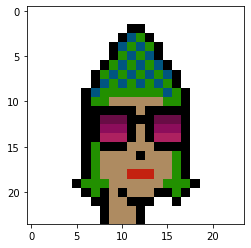

In [7]:
# Display a random image
index = random.randrange(0,len(image_bitmap_list),1)

#index = 3100

print("Punk_ID: ", image_bitmap_list[index]["punk_id"])
print("Type :", crypto_punks_df.loc[index,"type"])
print("Accessories :", crypto_punks_df.loc[index,"accessories"])
img = plt.imshow(image_bitmap_list[index]["image_bitmap"])

## 1. See how many other Crypto Punks share the same type and accessories

In [8]:
# Loop through the cyber_punks_df

In [9]:
sample_type = crypto_punks_df.loc[index,"type"]
print(sample_type)
#same_type = 
common_attributes_df = crypto_punks_df.groupby(by="type").count()
common_attributes_df

Female


,punk_id,accessories
type,,
Alien,9,9
Ape,24,24
Female,3840,3840
Male,6039,6039
Zombie,88,88


In [10]:
# Convert sample accessories to list
#1. create an empty list
sample_accessories_list = []

# 2. Read the string with the accessories
accessories = crypto_punks_df.loc[index,"accessories"]

# 3. remove brackets, spaces and quotes
accessories = accessories.replace("[","").replace("]","").replace(", ",",").replace("'","").replace("\"","")

# 4. convert the string to a list
sample_accessories_list = accessories.split(",")

print(sample_accessories_list)

# now convert the list to a dictionary
sample_accessories_dict = {}
for item in sample_accessories_list:
    sample_accessories_dict[item] = 0
    
print(sample_accessories_dict)

['Tassle Hat', 'Big Shades', 'Hot Lipstick']
{'Tassle Hat': 0, 'Big Shades': 0, 'Hot Lipstick': 0}


In [11]:
#for items in sample_accessories_list:
    
for row in range(len(crypto_punks_df)):
    
    # Extract the accessories as string
    id_accessories = crypto_punks_df.loc[row,"accessories"]
    
    # Convert the string to a list
    id_accessories_list = []
    id_accessories = id_accessories.replace("[","").replace("]","").replace(", ",",").replace("'","").replace("\"","")
    id_accessories_list = id_accessories.split(",")
    #print(row, id_accessories_list)

    for items in sample_accessories_list:
        for compare_items in id_accessories_list:
            if items == compare_items:
                #print(items, compare_items)
                #print (position)
                sample_accessories_dict[items] = sample_accessories_dict[items] + 1
                
print(sample_accessories_dict)


{'Tassle Hat': 178, 'Big Shades': 535, 'Hot Lipstick': 696}


In [12]:
print(sample_type, common_attributes_df.at[sample_type,"punk_id"])
for picks in sample_accessories_dict:
    print(picks, sample_accessories_dict[picks])

Female 3840
Tassle Hat 178
Big Shades 535
Hot Lipstick 696


In [13]:
# Create a dataframe
data = {}
attribute_list = []
counts_list = []

attribute_list.append(sample_type)
counts_list.append(common_attributes_df.at[sample_type,"punk_id"])
print(attribute_list)
print(counts_list)

for picks in sample_accessories_dict:
    attribute_list.append(picks)
    counts_list.append(sample_accessories_dict[picks])

data["Attribute"]= attribute_list
data["Punks that Share This Attribute"]= counts_list
print (data)

['Female']
[3840]
{'Attribute': ['Female', 'Tassle Hat', 'Big Shades', 'Hot Lipstick'], 'Punks that Share This Attribute': [3840, 178, 535, 696]}


In [14]:
shared_features_df = pd.DataFrame(data)
shared_features_df

,Attribute,Punks that Share This Attribute
0,Female,3840
1,Tassle Hat,178
2,Big Shades,535
3,Hot Lipstick,696


## 2. Transaction and Price History

/var/folders/lc/bd2hdpn53fnd_gtfy8gt049h0000gn/T/ipykernel_63744/1779700815.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(bid['date'], bid['eth']['median'], label="Bid Median Eth")


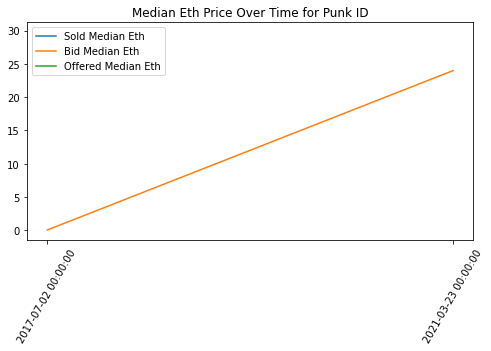

In [15]:
# Display transaction and price history
sold = tx_history_df[(tx_history_df.txn_type == 'Sold') & (tx_history_df.punk_id == index)].groupby("date").agg({"eth": ["median"]}).reset_index("date")
bid = tx_history_df[(tx_history_df.txn_type == 'Bid') & (tx_history_df.punk_id == index)].groupby("date").agg({"eth": ["median"]}).reset_index("date")
offered = tx_history_df[(tx_history_df.txn_type == 'Offered') & (tx_history_df.punk_id == index)].groupby("date").agg({"eth": ["median"]}).reset_index("date")

plt.figure(figsize=(8,4))
plt.plot(sold['date'], sold['eth']['median'], label="Sold Median Eth")
plt.plot(bid['date'], bid['eth']['median'], label="Bid Median Eth")
plt.plot(offered['date'], offered['eth']['median'], label="Offered Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price Over Time for Punk ID")
plt.show()

In [16]:
# Create a dataframe of deals for this Punk_ID
all_deals_df = tx_history_df[(tx_history_df["punk_id"]== index) & ((tx_history_df["txn_type"]=="Sold") | (tx_history_df["txn_type"]=="Transfer") | (tx_history_df["txn_type"]=="Bid") | (tx_history_df["txn_type"]=="Claimed") )]
all_deals_df = all_deals_df.sort_values(by="date")
all_deals_df

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
80603,Claimed,NaN,0x00bd9f,2017-06-23 00:00:00,2017-06-23 00:00:00,larvalabs,0.00,5221,NaN,NaN
80602,Bid,0x7760e0,NaN,2017-07-02 00:00:00,2017-07-02 00:00:00,larvalabs,0.05,5221,NaN,NaN
80601,Transfer,0x00bd9f,0xa3cb30,2018-03-07 00:00:00,2018-03-07 00:00:00,larvalabs,0.00,5221,NaN,NaN
80595,Transfer,0xa3cb30,0x062c54,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,0.00,5221,NaN,NaN
80596,Bid,0x62bdc6,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,24.50,5221,NaN,NaN
80597,Bid,0xf3016b,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,24.00,5221,NaN,NaN
80599,Bid,0xddfdcb,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,22.50,5221,NaN,NaN


In [17]:
all_deals_df.reset_index(drop=False, inplace=True)
all_deals_df

,index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,80603,Claimed,NaN,0x00bd9f,2017-06-23 00:00:00,2017-06-23 00:00:00,larvalabs,0.00,5221,NaN,NaN
1,80602,Bid,0x7760e0,NaN,2017-07-02 00:00:00,2017-07-02 00:00:00,larvalabs,0.05,5221,NaN,NaN
2,80601,Transfer,0x00bd9f,0xa3cb30,2018-03-07 00:00:00,2018-03-07 00:00:00,larvalabs,0.00,5221,NaN,NaN
3,80595,Transfer,0xa3cb30,0x062c54,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,0.00,5221,NaN,NaN
4,80596,Bid,0x62bdc6,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,24.50,5221,NaN,NaN
5,80597,Bid,0xf3016b,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,24.00,5221,NaN,NaN
6,80599,Bid,0xddfdcb,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,22.50,5221,NaN,NaN


In [18]:
deals_df = all_deals_df
for row in range(len(deals_df)):
    if deals_df.at[row,"from"] == "":
        deals_df.at[row,"from"] = "LarvaLabs"
    if (deals_df.at[row,"to"] == "") & (row >= 1):
        deals_df.at[row,"to"] = deals_df.at[row-1,"to"]
deals_df

,index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,80603,Claimed,NaN,0x00bd9f,2017-06-23 00:00:00,2017-06-23 00:00:00,larvalabs,0.00,5221,NaN,NaN
1,80602,Bid,0x7760e0,NaN,2017-07-02 00:00:00,2017-07-02 00:00:00,larvalabs,0.05,5221,NaN,NaN
2,80601,Transfer,0x00bd9f,0xa3cb30,2018-03-07 00:00:00,2018-03-07 00:00:00,larvalabs,0.00,5221,NaN,NaN
3,80595,Transfer,0xa3cb30,0x062c54,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,0.00,5221,NaN,NaN
4,80596,Bid,0x62bdc6,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,24.50,5221,NaN,NaN
5,80597,Bid,0xf3016b,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,24.00,5221,NaN,NaN
6,80599,Bid,0xddfdcb,NaN,2021-03-23 00:00:00,2021-03-23 00:00:00,larvalabs,22.50,5221,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

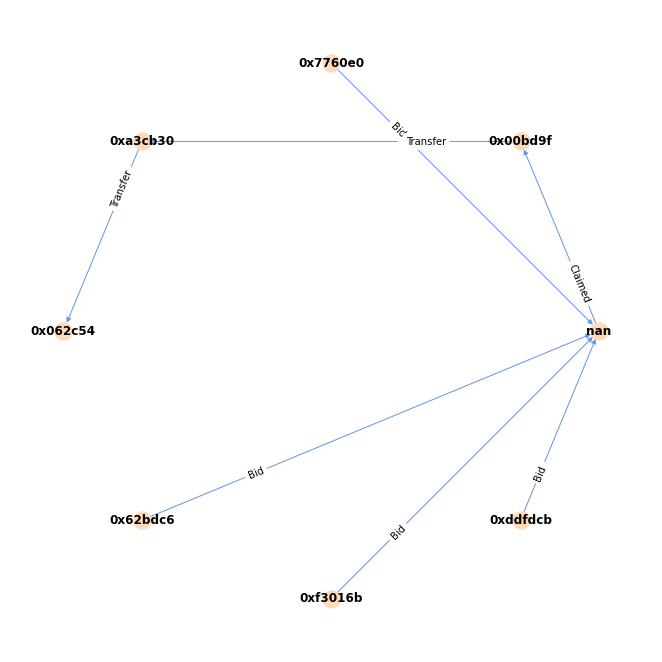

In [19]:
plt.figure(figsize=(9,9))

G = nx.MultiDiGraph()

# Create a empty dictionary for the edge labels
mylabels={}

color_dict = {"Sold": "green", "Transfer": "pink", "Bid": "orange", "Claimed": "yellow"}

for row in range(len(deals_df)):
    
    # Add to-from nodes
    G.add_node(deals_df.at[row,"from"])
    
    # Add edges to the nodes
    G.add_edge(deals_df.at[row,"from"],deals_df.at[row,"to"], color="red", weight=deals_df.at[row,"eth"], size=deals_df.at[row,"eth"])
    
    # Add the transaction type as edge label
    mylabels[deals_df.at[row,"from"],deals_df.at[row,"to"]]=deals_df.at[row,"txn_type"]


pos=nx.circular_layout(G)

nx.draw(G, pos, node_color='peachpuff', edge_color="cornflowerblue", with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, mylabels, label_pos=.75)

plt.show

## Visualize Most Active Traders

In [20]:
# Traders sorted by activity
sorted_traders_df = pd.DataFrame(traders_df.groupby(["trader_id"])['txn_type'].count())
sorted_traders_df = sorted_traders_df.sort_values(['txn_type'], ascending = False)
sorted_traders_df.reset_index(drop=False, inplace=True)
sorted_traders_df

,trader_id,txn_type
0,WrappedC…,5299
1,Pranksy,2896
2,Hemba,2413
3,0x717403,2336
4,0x00d7c9,2158
...,...,...
8469,0xc36efb,1
8470,0x3edd84,1
8471,0xc399f6,1
8472,ObiWanKe…,1


## Get Punk_IDs followed by a Randomly Chosen Trader

In [21]:
# Pick a random trader
pick_index = random.randrange(0,len(sorted_traders_df),1)
pick = sorted_traders_df.at[pick_index,"trader_id"]

#pick = "0x7b8961"

pick_df = traders_df[traders_df["trader_id"] == pick]

# View trader's activity
pick_df

,index,trader_id,txn_type,punk_id,eth,date,timestamp,source
125003,42204,registerartist.eth,Transfer,2999,0.0,2021-10-01 00:00:00,2021-10-01 23:02:13,opensea


In [22]:
# Summarized activity by Punk_IDs
print("Punk_IDs followed by trader: ",pick)
pick_summary = pd.DataFrame(pick_df.groupby(["punk_id"])['txn_type'].count())
pick_summary.rename(columns = {'txn_type':'actions'}, inplace = True)
pick_summary.sort_values(['actions'],
              ascending = False)
pick_summary.reset_index(drop=False, inplace=True)
pick_summary

Punk_IDs followed by trader:  registerartist.eth


,punk_id,actions
0,2999,1


Punk_ID:  2999
Type : Male
Accessories : ['Stringy Hair', 'Front Beard Dark', 'Eye Patch']


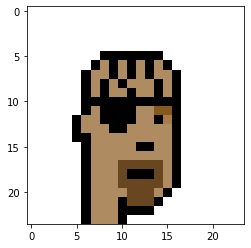

In [23]:
# View images of followed punk_ids
for row in range(len(pick_summary)):
    index = pick_summary.at[row,"punk_id"]
    print("Punk_ID: ", image_bitmap_list[index]["punk_id"])
    print("Type :", crypto_punks_df.loc[index,"type"])
    print("Accessories :", crypto_punks_df.loc[index,"accessories"])
    img = plt.imshow(image_bitmap_list[index]["image_bitmap"])
    

In [24]:
# create plot
plt.figure(0, figsize=(12,25))

# Initialize variables
cpt = 0
pic_size = 24

# Loop for each row to plot
for n in range(7):

    # Loop for each column to plot
    for i in range(1,6):
        cpt=cpt + 1
        plt.subplot(7,5,cpt)
        
        # Select a random punk image and add it to the plot
        for index in range(len(pick_summary)):
            
        id = random.randint(0,9999)
        file_to_load = ("Data/images/"+str(id)+".png")
        punk_image = Image.open(file_to_load)
        plt.imshow(punk_image)
        plt.title("punk_id "+str(id))
        punk_type = crypto_punks_df.loc[crypto_punks_df["punk_id"] == id,"type"].iloc[0]
        punk_accessories = crypto_punks_df.loc[crypto_punks_df["punk_id"] == id,"accessories"].iloc[0]
        wrapped_label = punk_type+"\n"+("\n".join(wrap(punk_accessories,20)))
        plt.xlabel(wrapped_label)
        
# Show the plotted images   
plt.tight_layout()
plt.show

IndentationError: expected an indented block (736038450.py, line 19)